Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

Read the female respondent file.

In [23]:
%matplotlib inline
import thinkstats2
import thinkplot
import numpy as np

import chap01soln
resp = chap01soln.ReadFemResp()

Make a PMF of <tt>numkdhh</tt>, the number of children under 18 in the respondent's household.

In [5]:
df = resp.numkdhh
pmf_act = thinkstats2.Pmf(df, label = 'actual')

Display the PMF.

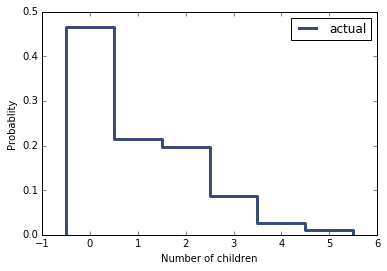

In [10]:
thinkplot.Pmf(pmf_act)
thinkplot.Show(xlabel = 'Number of children', ylabel = 'Probablity')

Define <tt>BiasPmf</tt>.

In [7]:
def BiasPmf(pmf, label=''):
    """Returns the Pmf with oversampling proportional to value.

    If pmf is the distribution of true values, the result is the
    distribution that would be seen if values are oversampled in
    proportion to their values; for example, if you ask students
    how big their classes are, large classes are oversampled in
    proportion to their size.

    Args:
      pmf: Pmf object.
      label: string label for the new Pmf.

     Returns:
       Pmf object
    """
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

Make a the biased Pmf of children in the household, as observed if you surveyed the children instead of the respondents.

In [8]:
pmf_bs = BiasPmf(pmf_act, 'Biased')

Display the actual Pmf and the biased Pmf on the same axes.

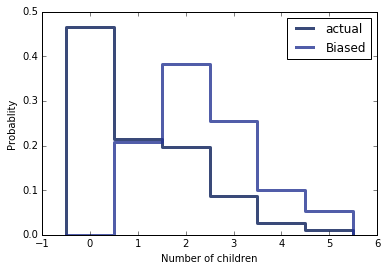

In [13]:
thinkplot.Pmfs([pmf_act, pmf_bs])
thinkplot.Show(xlabel = 'Number of children', ylabel = 'Probablity')

Compute the means of the two Pmfs.

In [26]:
def pmf_mean(pmf):
    """
    Returns the average value of given pmf
    """
    
    return np.sum([val * pmf[val] for val in pmf])

print "Average number of children for actual pmf: ", pmf_mean(pmf_act)    
print "Average number of children for biased pmf: ", pmf_mean(pmf_bs) 

Average number of children for actual pmf:  1.02420515504
Average number of children for biased pmf:  2.40367910066


### ThinkStats Chapter 3, Exercise 3

I started with the question, “Are first babies more likely to be late?” To address it, I computed the difference in means between groups of babies, but I ignored the possibility that there might be a difference between first babies and others for the same woman.

To address this version of the question, select respondents who have at least two babies and compute pairwise differences. Does this formulation of the question yield a different result?

Hint: use nsfg.MakePregMap.

In [28]:
# import data and make a preg map
import nsfg
alive = nsfg.ReadFemPreg()
preg_map = nsfg.MakePregMap(alive)

In [52]:
def diff_one(lengths):
    """
    Returns an array of difference between 
    fisrt baby and the others for a single mother
    """
    return [(prglngth - lengths[0]) for prglngth in lengths[1:]]
    
def diff_all(preg_map):
    """
    Returns an array of difference between 
    fisrt baby and the others for all mothers
    in the preg_map
    """
    diffs = []
    for caseid, index in preg_map.items():
        lengths = alive.loc[index].prglngth.values
        if len(lengths) > 1:
            diffs.extend(diff_one(lengths))
            
    return np.asarray(diffs)

In [55]:
diff_firsts_others = diff_all(preg_map)
mean_diff = diff_firsts_others.mean()
pmf_babies = thinkstats2.Pmf(diff_firsts_others)

Mean difference between prglngths of first babies and those of others 2.11308411215


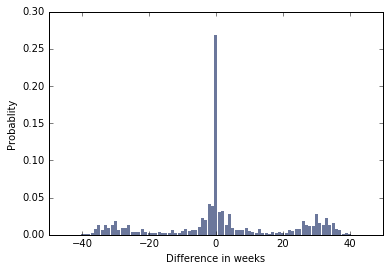

In [59]:
print 'Mean difference between prglngths of first babies and those of others', mean_diff
thinkplot.Hist(pmf_babies, align='center')
thinkplot.Show(xlabel='Difference in weeks',ylabel='Probablity')

From the above analysis, we can see that the mean difference between first and other babies's pregnant length is about 2 weeks. We can't really tell much from the plotted distribution graph. The bumps on the left is a little smaller than that on the right. But for now, we can tentatively reasons that the first babies of same mother tends to have shorter pregnant length than others. However, to determine whether the mean difference of about 2 weeks is statistically significant, we still need to further explore the data.

### Clarifying Questions

Use this space to ask questions regarding the content covered in the reading. These questions should be restricted to helping you better understand the material. For questions that push beyond what is in the reading, use the next answer field. If you don't have a fully formed question, but are generally having a difficult time with a topic, you can indicate that here as well.

### Enrichment Questions

Use this space to ask any questions that go beyond (but are related to) the material presented in this reading. Perhaps there is a particular topic you'd like to see covered in more depth. Perhaps you'd like to know how to use a library in a way that wasn't show in the reading. One way to think about this is what additional topics would you want covered in the next class (or addressed in a followup e-mail to the class). I'm a little fuzzy on what stuff will likely go here, so we'll see how things evolve.

### Additional Resources / Explorations

If you found any useful resources, or tried some useful exercises that you'd like to report please do so here. Let us know what you did, what you learned, and how others can replicate it.